In [151]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as pl
import seaborn as sns


In [152]:
data = pd.read_csv("./avocado.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [153]:
#data.describe()
#data.isnull().sum()
data.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

###LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels

In [154]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(data['type'].drop_duplicates()) 
dicts['type'] = list(label.classes_)
data['type'] = label.transform(data['type'])

label.fit(data['region'].drop_duplicates()) 
dicts['region'] = list(label.classes_)
data['region'] = label.transform(data['region'])
 


#data.tail()


 

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')




x = data.drop(['Date','type'],axis=1)
y = data['type']
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0)


In [156]:
logreg =  LogisticRegression(penalty='l1', tol=0.0001).fit(x_train,y_train)
print("LogisticRegression train data score:{:.3f}".
     format(logreg.score(x_train,y_train)))
print("LogisticRegression test data score:{:.3f}".
     format(logreg.score(x_test,y_test)))


LogisticRegression train data score:0.948
LogisticRegression test data score:0.948


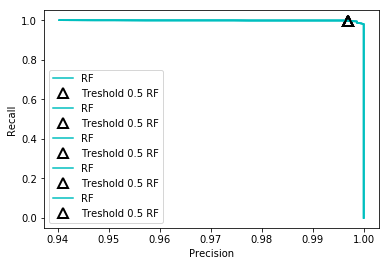

In [158]:
rf =  RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(x_train,y_train)
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])

pl.plot(precision_rf,recall_rf,label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
pl.plot(precision_rf[close_default_rf],
        recall_rf[close_default_rf],'^',c = 'k', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
pl.xlabel("Precision")
pl.ylabel("Recall")
pl.legend(loc = "best")
pl.show()

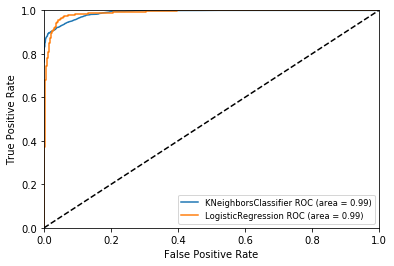

In [160]:
kfold = 10 
result = {} 
trn_train, trn_test, trg_train, trg_test = cross_validation.train_test_split(x, y, test_size=0.25) 
knn = KNeighborsClassifier(n_neighbors = 200) 
log_reg = LogisticRegression(penalty='l1', tol=0.001) 
scores = cross_validation.cross_val_score(knn, x, y, cv = kfold)
result['KNeighborsClassifier'] = scores.mean()
scores = cross_validation.cross_val_score(log_reg, x, y, cv = kfold)
result['LogisticRegression'] = scores.mean()
pl.clf()

knn_result = knn.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, knn_result[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

logreg_result = log_reg.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, logreg_result[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()